In [204]:
%load_ext autoreload
%autoreload 2

from functions import *
from tqdm import *

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, balanced_accuracy_score, log_loss, accuracy_score
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.svm import SVC
from xgboost import XGBRegressor, plot_importance, XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import wilcoxon

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

from collections import defaultdict

import true_preprocessing
import cross_validations

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Preprocessing

In [225]:
X_0 = pd.concat([pd.DataFrame(true_preprocessing.X),true_preprocessing.meta_data['vegetable_frequency']],axis=1)
X_1 = remove_rows_where_column_nan(X_0,'vegetable_frequency')
X_2 = remove_rows_where_column_specified(X_1,'vegetable_frequency','Unspecified','vegetable_frequency','other','vegetable_frequency','unknown')
X_2.loc[:,'vegetable_frequency'].unique()

array(['Regularly (3-5 times/week)', 'Daily',
       'Occasionally (1-2 times/week)', 'Rarely (less than once/week)',
       'Never'], dtype=object)

In [226]:
X_2.loc[:,'vegetable_frequency'].value_counts()

Daily                            2006
Regularly (3-5 times/week)       1350
Occasionally (1-2 times/week)     363
Rarely (less than once/week)      117
Never                              45
Name: vegetable_frequency, dtype: int64

<Axes: >

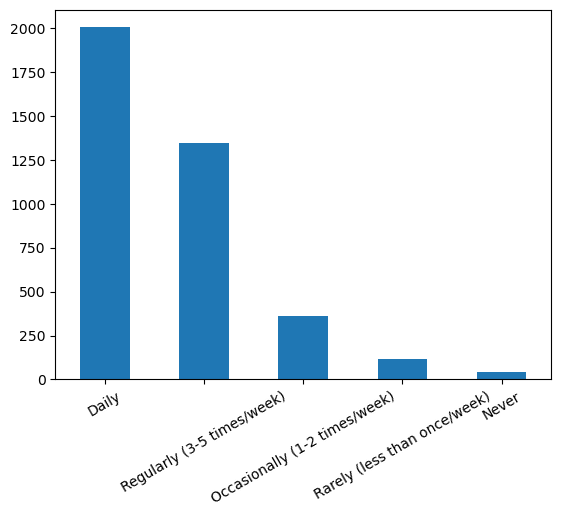

In [227]:
X_2.loc[:,'vegetable_frequency'].value_counts().plot(kind='bar', rot=30)

In [228]:
# Combining 'Never' and 'Rarely (less than once/week)'
X_2.loc[X_2['vegetable_frequency'] == 'Never', 'vegetable_frequency'] = 'Rarely (less than once/week)'
X_2.loc[:,'vegetable_frequency'].unique()

array(['Regularly (3-5 times/week)', 'Daily',
       'Occasionally (1-2 times/week)', 'Rarely (less than once/week)'],
      dtype=object)

<Axes: >

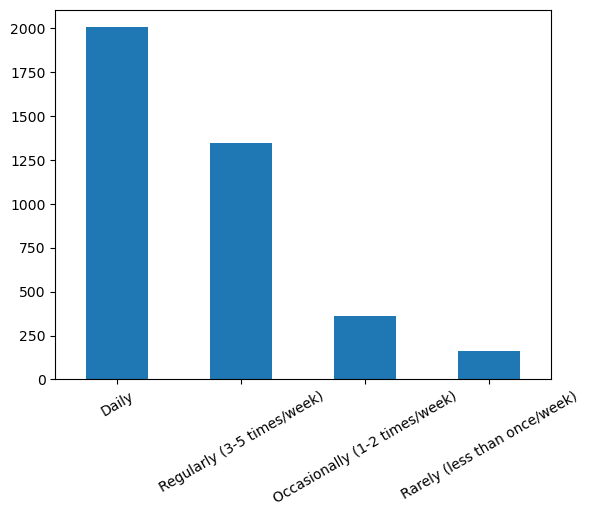

In [229]:
X_2.loc[:,'vegetable_frequency'].value_counts().plot(kind='bar', rot=30)

In [230]:
X = X_2.iloc[:,:-1]; y = X_2.iloc[:,-1]

# CV

In [28]:
svm_scores, svm_params = cross_validations.SVM_CV(X.iloc[:,1:],y)
logistic_scores, logistic_params = cross_validations.logistic_CV(X.iloc[:,1:],y)
rf_scores, rf_params = cross_validations.rf_CV(X.iloc[:,1:],y)
XGB_scores, XGB_params = cross_validations.XGB_CV(X.iloc[:,1:],y)
dummy_scores = cross_validations.dummy_CV(X.iloc[:,1:],y)

>acc=0.310, est=0.329, cfg={'C': 10, 'gamma': 0.001}
>acc=0.327, est=0.323, cfg={'C': 100, 'gamma': 0.001}
>acc=0.319, est=0.321, cfg={'C': 10, 'gamma': 0.001}
>acc=0.344, est=0.319, cfg={'C': 100, 'gamma': 0.001}
>acc=0.341, est=0.322, cfg={'C': 100, 'gamma': 0.001}
>acc=0.306, est=0.330, cfg={'C': 10, 'gamma': 0.001}
>acc=0.320, est=0.305, cfg={'C': 10, 'gamma': 0.001}
>acc=0.292, est=0.311, cfg={'C': 0.01, 'penalty': 'l2'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


>acc=0.335, est=0.313, cfg={'C': 10.0, 'penalty': 'l2'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


>acc=0.289, est=0.314, cfg={'C': 1.0, 'penalty': 'l2'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


>acc=0.338, est=0.328, cfg={'C': 1.0, 'penalty': 'l2'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


>acc=0.311, est=0.320, cfg={'C': 100.0, 'penalty': 'l2'}
>acc=0.286, est=0.319, cfg={'C': 0.1, 'penalty': 'l2'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


>acc=0.285, est=0.314, cfg={'C': 10.0, 'penalty': 'l1'}
>acc=0.295, est=0.303, cfg={'max_features': 0.9, 'n_estimators': 525}
>acc=0.280, est=0.294, cfg={'max_features': 0.9, 'n_estimators': 50}
>acc=0.304, est=0.296, cfg={'max_features': 0.9, 'n_estimators': 1000}
>acc=0.290, est=0.291, cfg={'max_features': 0.9, 'n_estimators': 525}
>acc=0.295, est=0.299, cfg={'max_features': 0.475, 'n_estimators': 50}
>acc=0.290, est=0.295, cfg={'max_features': 0.9, 'n_estimators': 1000}
>acc=0.301, est=0.294, cfg={'max_features': 0.475, 'n_estimators': 525}
>acc=0.297, est=0.305, cfg={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 500}
>acc=0.279, est=0.295, cfg={'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 1000}
>acc=0.274, est=0.302, cfg={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 1000}
>acc=0.332, est=0.291, cfg={'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 1000}
>acc=0.287, est=0.301, cfg={'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}
>acc=0.300,

# Evaluation plots

Text(0.5, 0, 'Method')

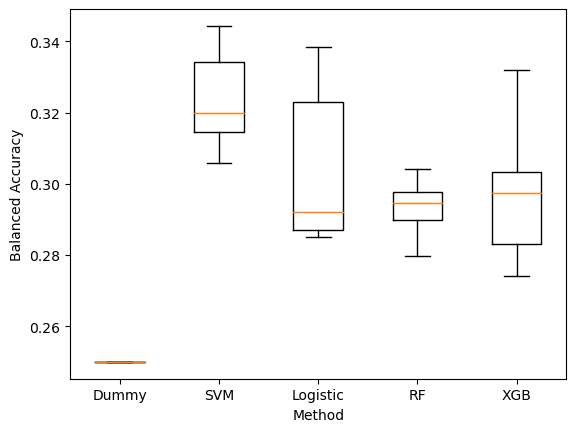

In [72]:
plt.boxplot([dummy_scores, np.ravel(svm_scores), logistic_scores, rf_scores, XGB_scores], labels=['Dummy', 'SVM', 'Logistic', 'RF', 'XGB'])
#plt.ylim(14,16.5)
plt.ylabel('Balanced Accuracy')
plt.xlabel('Method')
#plt.gca().invert_yaxis()
#After changing feature thresholds

# Wilcoxon Signed-Rank test

In [237]:
# Calculates p-value
#Remember to change alternative, if we can't expect the model to perform greater
print('SVM statistic=%.0f and p-value=%.4f' % (wilcoxon(svm_scores,dummy_scores, alternative='greater')))
print('Logistic statistic=%.0f and p-value=%.4f' % (wilcoxon(logistic_scores,dummy_scores, alternative='greater')))
print('rf statistic=%.0f and p-value=%.4f' % (wilcoxon(rf_scores,dummy_scores, alternative='greater')))
print('XGB statistic=%.0f and p-value=%.4f' % (wilcoxon(XGB_scores,dummy_scores, alternative='greater')))

SVM statistic=28 and p-value=0.0078
Logistic statistic=28 and p-value=0.0078
rf statistic=28 and p-value=0.0078
XGB statistic=28 and p-value=0.0078


In [238]:
# Store scores for intermodel comparison across all 5 targets
vegetable_frequency_svm = svm_scores; vegetable_frequency_log = logistic_scores; vegetable_frequency_rf = rf_scores; vegetable_frequency_XGB = XGB_scores; 
%store vegetable_frequency_svm
%store vegetable_frequency_log
%store vegetable_frequency_rf
%store vegetable_frequency_XGB

Stored 'vegetable_frequency_svm' (list)
Stored 'vegetable_frequency_log' (list)
Stored 'vegetable_frequency_rf' (list)
Stored 'vegetable_frequency_XGB' (list)


# Feature importance

## Calculation

In [31]:
svm_best_params = svm_params[np.array(svm_scores).argmax()]
logistic_best_params = logistic_params[np.array(logistic_scores).argmax()]
rf_best_params = rf_params[np.array(rf_scores).argmax()]
XGB_best_params = XGB_params[np.array(XGB_scores).argmax()]

In [156]:
features_SVM, yhat_SVM = SVM_features(X.iloc[:,1:],y,C=svm_best_params['C'], gamma=svm_best_params['gamma'])
acc_SVM = balanced_accuracy_score(y, yhat_SVM)

In [138]:
features_logistic, yhat_logistic = logistic_features(X.iloc[:,1:],y,C=logistic_best_params['C'], penalty=logistic_best_params['penalty'])
acc_log = balanced_accuracy_score(y, yhat_logistic)

In [153]:
features_rf, yhat_rf = rf_features(X.iloc[:,1:],y,n_estimators=rf_best_params['n_estimators'], max_features=rf_best_params['max_features'])
acc_rf = balanced_accuracy_score(y, yhat_rf)

In [148]:
features_XGB, yhat_XGB = XGB_features(X.iloc[:,1:],y,learning_rate=XGB_best_params['learning_rate'], 
                       max_depth=XGB_best_params['max_depth'], n_estimators=XGB_best_params['n_estimators'])
acc_XGB = balanced_accuracy_score(y, yhat_XGB)

c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective, use_label_encoder` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


## Visualisations

In [231]:
feature_importances_dict = {
    'SVM': features_SVM['Importance'],
    'Logistic Regression': features_logistic['Importance'],
    'RF': features_rf['Importance'],
    'XGBoost': features_XGB['Importance'],
}
feature_names = list(X.columns)[1:]
top_k = 10

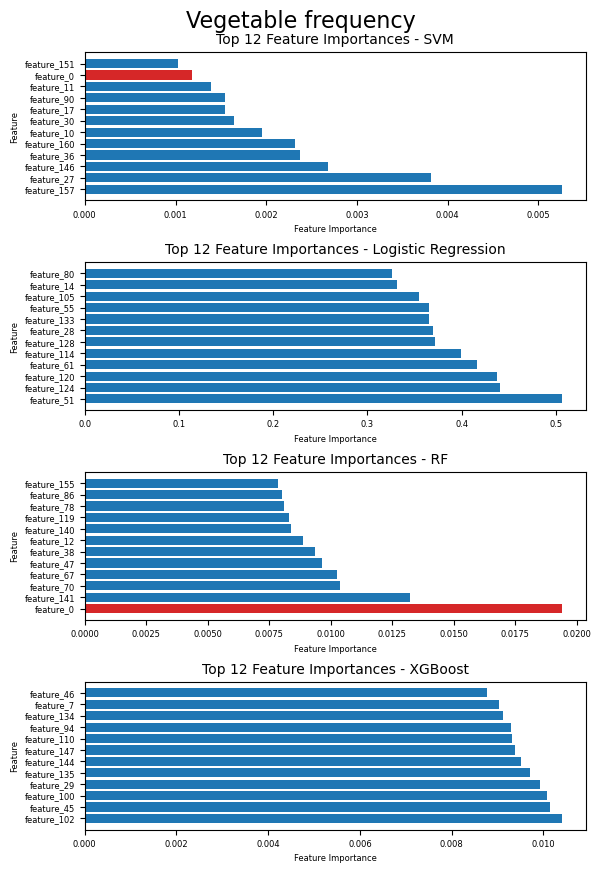

In [236]:
plot_top_features_subplot(feature_importances_dict, rename_columns(feature_names, list_bool=True), 12, 'Vegetable frequency')